### Disease Clsf w Transferlearning

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"cinnamonica002","key":"ccdeaa9abc05a6fdaf2264050f4b6d31"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 33% 5.00M/15.1M [00:00<00:00, 32.7MB/s]
100% 15.1M/15.1M [00:00<00:00, 76.4MB/s]


In [ ]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip -d /content/

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: /content/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/brain_tumor_dataset/no/19 no.jpg  
  inflating: /content/brain_tumor_dataset/no/2 no.jpeg  
  inflating: /content/brain_tumor_dataset/no/20 no.jpg  
  inflating: /content/brain_tumor_dataset/no/21 no.jpg  
  inflating: /content/brain_tumor_dataset/no/22 no.jpg  
  inflating: /content/brain_tumor_dataset/no/23 no.jpg  
  inflating: /content/brain_tumor_dataset/no/24 no.jpg  
  inflating: /content/

In [ ]:
from __future__ import print_function

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os, glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D, Convolution2D
from keras.layers import BatchNormalization
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

<ipython-input-7-1698235fafc0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
### extracting the data in or 'yes' and 'no' folders for our model

os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img, (224, 224))
  X.append(img)
  y.append((i[0:1]))
  print(i[0:1])
os.chdir('/content/no')
for i in tqdm(os.listdir()):
  img = cv2.imread(i)
  img = cv2.resize(img, (224, 224))
  X.append(img)
for i in range(1, 99):
  y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

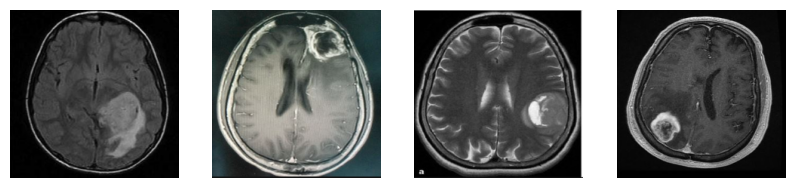

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(X[i], cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Shape of image in X_train:  ', X_train[0].shape)
print('Shape of image in X_test:  ', X_test[0].shape )

Shape of image in X_train:   (224, 224, 3)
Shape of image in X_test:   (224, 224, 3)


In [ ]:
### Transforming our labels

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)


In [ ]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (169, 224, 224, 3)
y_train shape:  (169, 2)
X_test shape:  (84, 224, 224, 3)
y_test shape:  (84, 2)


In [ ]:
from keras.applications import vgg16

img_rows, img_cols = 224, 224

vgg = vgg16.VGG16(weights='imagenet',
                  include_top=False, # copying same weights from pretrained model
                  input_shape = (img_rows, img_cols, 3))
### Freezing last 2 layers and setting trainable as True by default
for layer in vgg.layers:
  layer.trainable = False

  ### Let's print our layers
for (i, layer) in enumerate(vgg.layers):
  print(str(i), layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
## Adding a few more layers to our pretrained model
def lw(bottom_model, num_classes):
  """creating top head of our model that will be placed ontop of
  bottom layers"""

  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(512, activation='relu')(top_model)
  top_model = Dense(num_classes, activation='softmax')(top_model)
  return top_model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    initial_epoch=0)

Epoch 1/5
6/6 [==============================] - 20s 2s/step - loss: 5.7090 - accuracy: 0.5917 - val_loss: 0.4833 - val_accuracy: 0.7619
Epoch 2/5
6/6 [==============================] - 1s 211ms/step - loss: 0.9806 - accuracy: 0.6095 - val_loss: 0.6085 - val_accuracy: 0.7024
Epoch 3/5
6/6 [==============================] - 1s 213ms/step - loss: 0.4302 - accuracy: 0.8047 - val_loss: 0.4433 - val_accuracy: 0.7738
Epoch 4/5
6/6 [==============================] - 1s 212ms/step - loss: 0.3314 - accuracy: 0.8757 - val_loss: 0.3525 - val_accuracy: 0.8333
Epoch 5/5
6/6 [==============================] - 1s 211ms/step - loss: 0.2105 - accuracy: 0.9290 - val_loss: 0.3187 - val_accuracy: 0.8810


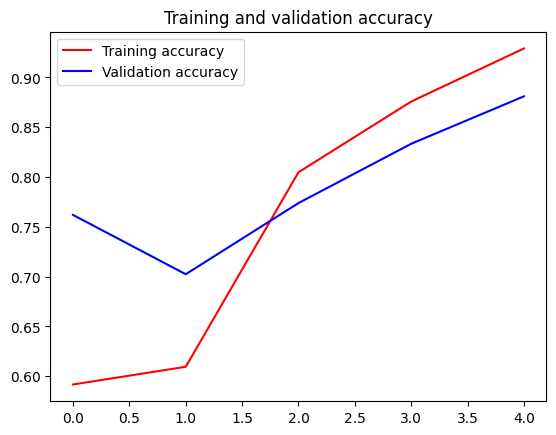

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure()
plt.show()